


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados foi modificado do original.

Conforme eu vá avançando na aplicação das técnicas de python, eu irei explicando o que será feito.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Etapa de importação das bibliotecas Python, importação dos dados das tabelas e também mostrar preliminarmente os dados.


In [4]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df_insta = pd.read_csv('instacart_orders.csv', sep=';')
df_prod = pd.read_csv('products.csv', sep=';')
df_aisle = pd.read_csv('aisles.csv', sep=';')
df_depar = pd.read_csv('departments.csv', sep=';')
df_ord = pd.read_csv('order_products.csv', sep=';')

In [7]:
df_insta.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [8]:
df_prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
df_aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [10]:
df_depar.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
df_ord.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusões

Os dados estão consistentes e bem organizados, porém é preciso verificar valores duplicados e ausentes e também limpar os dados para que tenhamos uma análise mais segura.

# Etapa 2. Preparação de dados

-	Verificação e correção os tipos de dados
-	Identificação e preenchimento de valores ausentes
-	Identificação e remoção de valores duplicados


## Plano de solução

Meu plano para essa seção são os códigos de correção do tipo de dados, como por exemplo: str, int, float, etc.. e também procurar por valores ausentes usando a fórmula ISNA e podemos preencher estes valores com a método FILLNA e também o replace e, por fim, podemos verificar os dados duplicados com o método DUPLICATED e removê-los com o método DROP.DUPLICATES.

### DataFrame `orders`

In [8]:
duplicated_rows = df_insta[df_insta.duplicated(keep=False)]
print(duplicated_rows)
print()
print("A soma do número de linhas duplicados no Dataframe é: ", df_insta.duplicated().sum())# Verificar se há pedidos duplicados

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

O que podemos notar no DF é que todos pedidos duplicados tem em comum o dia da semana: dia 3 (quarta-feira) e a hora da semana: 2 (2 da manhã).

In [9]:
# Com base nas suas conclusões,
def orders_day_hour(df_insta, order_dow, order_hour_of_day):
    df_filtered_day = df_insta[df_insta['order_dow'] == 3]
    df_filtered_day_hour = df_filtered_day[df_filtered_day['order_hour_of_day'] == 2]
    
    order_day_hour = df_filtered_day_hour['order_id']
    
    return order_day_hour
    
result = orders_day_hour(df_insta, 3, 2)
print(result.reset_index(drop=True))

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

0      2766110
1      2190225
2       553049
3       382357
4       690242
        ...   
116    3384021
117     910166
118    1680532
119     222962
120    2592344
Name: order_id, Length: 121, dtype: int64


O que esse resultado quer dizer?

Esse resultado quer dizer que nós temos 106 pedidos feitos às 2 horas da manhã na quarta-feira.

In [10]:
df_insta.drop_duplicates(inplace=True)# Remova pedidos duplicados

In [11]:
print(df_insta.duplicated().sum())# Verifique as linhas duplicadas mais uma vez

0


In [12]:
df_filtered_1 = df_insta[df_insta.duplicated(keep=False)]
print(df_filtered_1)# Verifique novamente apenas os IDs de pedidos duplicados

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Olhando para o Dataframe, notamos que haviam 15 linhas duplicadas que identificamos pelo dia "3" (quarta-feira) e pela hora "2" (2 horas da manhã). A partir disso, conseguimos limpar os dados usando os métodos de pandas certos para removê-los para deixar nossa análise mais clara.

Descreva brevemente suas conclusões e o que você fez com elas.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante verificou corretamente que pedidos duplicados ocorreram às 2:00 da manhã de Quarta-feira, o que pode sugerir um erro na geração dos dados.
</div>


### DataFrame `products`

In [13]:
df_prod.duplicated().sum()

0

In [14]:
df_filtered_3 = df_prod['product_id'].duplicated().sum()
print(df_filtered_3) # Verifique apenas se há IDs de departamentos duplicados

0


In [15]:
df_lower = df_prod['product_name'].str.lower()
print(df_lower.head())
print()
duplicated_prod = df_lower.duplicated().sum()
print("A soma de produtos duplicados no Dataframe é de: ", duplicated_prod)# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
print()
print(df_lower[df_lower.duplicated()])

0                           chocolate sandwich cookies
1                                     all-seasons salt
2                 robust golden unsweetened oolong tea
3    smart ones classic favorites mini rigatoni wit...
4                            green chile anytime sauce
Name: product_name, dtype: object

A soma de produtos duplicados no Dataframe é de:  1361

71                                                   NaN
109                                                  NaN
296                                                  NaN
416                                                  NaN
436                                                  NaN
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: p

In [16]:
df_lower.dropna(inplace=True)
print(df_lower.value_counts().sort_values(ascending=False))
print()
duplicated_prod = df_lower.duplicated().sum()
print("A soma de produtos duplicados no Dataframe é de: ", duplicated_prod)
# Verifique os nomes de produtos duplicados que não estão faltando

green tea with ginseng and honey                    3
cream of celery condensed soup                      2
chicken in a biskit baked snack crackers            2
pineapple slices in heavy syrup                     2
tomato juice from concentrate                       2
                                                   ..
orange decorating icing                             1
hearty garlic deli style sandwich slices pickles    1
berry chewable tablets                              1
mild diced green chiles fire roasted                1
all natural free range chicken cat treats           1
Name: product_name, Length: 48332, dtype: int64

A soma de produtos duplicados no Dataframe é de:  104


Descreva brevemente suas conclusões e o que você fez com elas.

Verificamos nessa questão que haviam 1361 produtos duplicados e muitos deles eram "NaNs" e logo depois eu retirei os mesmos com o método "dropna" e achei o novo número de produtos duplicados que é 104.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>
- Os nomes dos produtos foram convertidos para `lowercase` para padronização
- As conclusões intermediárias foram apresentadas. Nesta seção, você conclui que não há produtos duplicados, entretanto, você faz a remoção dos itens duplicados previamente, ou seja, você deve checar essa hipótese **antes** de remover as linhas duplicadas. Peço que atualize a sua conclusão desta seção.
</s>
</div>


### DataFrame `departments`

In [17]:
df_depar.duplicated().sum()# Verifique se há linhas completamente duplicadas

0

In [18]:
df_filtered_3 = df_depar['department_id'].duplicated().sum()
print(df_filtered_3)# Verifique apenas se há IDs dos produtos duplicados

0


Descreva brevemente suas conclusões e o que você fez com elas.

Nesta seção foi verificado se haviam linhas e itens duplicados no dataframe e notamos que não haviam.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


### DataFrame `aisles`

In [19]:
df_aisle.duplicated().sum()# Verifique se há linhas completamente duplicadas

0

In [20]:
df_filtered_4 = df_aisle['aisle_id'].duplicated().sum()
print(df_filtered_4)# Verifique apenas se há IDs dos produtos duplicados

0


Descreva brevemente suas conclusões e o que você fez com elas.

Nesta seção foi verificado se haviam linhas e itens duplicados no dataframe e notamos que não haviam.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


### DataFrame `order_products`

In [21]:
df_ord.duplicated().sum()# Verifique se há linhas completamente duplicadas

0

In [22]:
duplicated_order = df_ord[df_ord.duplicated(keep=False)]
print(duplicated_order)# Verifique mais uma vez se há outros casos complicados de duplicados

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


Descreva brevemente suas conclusões e o que você fez com elas.

Nesta seção foi verificado se haviam linhas e itens duplicados no dataframe e notamos que não haviam.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os valores duplicados foram verificados
- As conclusões intermediárias foram apresentadas
</div>


## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [23]:
print(df_prod['product_name'].isna().sum())
print()
print(df_prod['product_name'].value_counts(dropna=False))# Encontre valores ausentes na coluna 'product_name'

1258

NaN                                               1258
Greek Corner Caramelized Almonds Lowfat Yogurt       1
Bean & Rice Chips- Ranch                             1
Silicone Baby 3-12 Months Toothbrush                 1
Popped Rice Snacks Butter Popcorn Flavor             1
                                                  ... 
All Natural Vanilla Extract                          1
Organic Milled Flax Seeds                            1
Naturally Rising Crust Classic Supreme Pizza         1
Morning Fog Chardonnay                               1
Natural Coconut Water                                1
Name: product_name, Length: 48437, dtype: int64


Descreva brevemente suas conclusões.

Filtrando o DataFrame, vemos que temos 1258 valores ausentes na coluna 'product_name'.

In [24]:
print(df_prod[df_prod['aisle_id'] == 100].head(15))
print()
print(df_prod[df_prod['aisle_id'] == 100].tail(15))
print()
print(df_prod[df_prod['aisle_id'] == 100].sample(15))
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21
561         562          NaN       100             21
613         614          NaN       100             21
623         624          NaN       100             21
689         690          NaN       100             21
767         768          NaN       100             21

       product_id product_name  aisle_id  department_id
48886       48887          NaN       100             21
49016       49017      

Descreva brevemente suas conclusões.

O que podemos notar é que todos os valores ausentes estão relacionados com o resultado da coluna 'aisle_id' = 100.



In [25]:
print(df_prod[df_prod['department_id'] == 21].head(15))
print()
print(df_prod[df_prod['department_id'] == 21].tail(15))
print()
print(df_prod[df_prod['department_id'] == 21].sample(15))
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21
436         437          NaN       100             21
439         440          NaN       100             21
471         472          NaN       100             21
490         491          NaN       100             21
555         556          NaN       100             21
561         562          NaN       100             21
613         614          NaN       100             21
623         624          NaN       100             21
689         690          NaN       100             21
767         768          NaN       100             21

       product_id product_name  aisle_id  department_id
48886       48887          NaN       100             21
49016       49017      

Descreva brevemente suas conclusões.

O que podemos notar é que todos os valores ausentes estão relacionados com o resultado "department_id" = 21.

In [26]:
print(df_depar[df_depar['department_id'] == 21].head())
print()
print(df_aisle[df_aisle['aisle_id'] == 100].head())# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.

    department_id department
20             21    missing

    aisle_id    aisle
99       100  missing


Descreva brevemente suas conclusões.

Podemos notar com esse resultado que o valor correspondente a 21 no Dataframe 'df_depar' está ausentes, assim como o valor correspondente a 100 no Dataframe 'df_aisle' está também ausente. Isso jusfica o porquê dos valores ausentes no Dataframe "df_prod".



<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A verificação de que os produtos com nomes vazios estão associados com o `departamento==21` e `aisle==100` foi realizada.
</div>


In [27]:
df_prod['product_name'].fillna('Unknown', inplace=True)
print(df_prod[df_prod['aisle_id'] == 100].head(50))# Preencha nomes de produtos ausentes com 'Unknown'

      product_id product_name  aisle_id  department_id
37            38      Unknown       100             21
71            72      Unknown       100             21
109          110      Unknown       100             21
296          297      Unknown       100             21
416          417      Unknown       100             21
436          437      Unknown       100             21
439          440      Unknown       100             21
471          472      Unknown       100             21
490          491      Unknown       100             21
555          556      Unknown       100             21
561          562      Unknown       100             21
613          614      Unknown       100             21
623          624      Unknown       100             21
689          690      Unknown       100             21
767          768      Unknown       100             21
803          804      Unknown       100             21
890          891      Unknown       100             21
990       

Descreva brevemente suas conclusões e o que você fez com elas.

Utilizando o método Fillna, substituímos os valores ausentes pela string 'Unknown'.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os produtos com nomes ausentes foram preenchidos com `Unknown`.
</div>


### DataFrame `orders`

In [28]:
print(df_insta.isna().sum())# Encontre os valores ausentes

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
loyal_cli = df_insta[df_insta['days_since_prior_order'] > 0]
print(loyal_cli.isna().sum())# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Notou-se que há 28817 valores ausentes na coluna 'days_since_prior_order', ou seja, pessoas provavelmente colocaram o pedido no carrinho e não finalizaram a compra. Notamos também que não há valores ausentes para clientes que já fizeram seu primeiro pedido pela plataforma.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante apresentou as observações sobre o atributo `days_since_prior_order`.
</div>


### DataFrame `order_products`

In [30]:
print(df_ord.isna().sum())# Encontre os valores ausentes

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
print("Os valores mínimo e máximo da coluna add_to_cart_order são respectivamente:", 
      df_ord['add_to_cart_order'].min(), 
      df_ord['add_to_cart_order'].max())

Os valores mínimo e máximo da coluna add_to_cart_order são respectivamente: 1.0 64.0


Descreva brevemente suas conclusões.

Notou-se que há 836 valores ausentes na coluna 'add_to_cart_order' e que os valores máximos e míninos desta mesma coluna são respectivamente: 1 e 64.

In [32]:
mis_value = df_ord['add_to_cart_order'].isna()
id_mis = df_ord['order_id'][mis_value].unique()
print(id_mis)
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

[2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
df_nan = df_ord[mis_value].copy()
print("O valor mínino de produtos em um pedido com valores ausentes é: ", df_nan['product_id'].min())# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
print()
group_nan = df_nan.groupby('product_id')# Agrupe os pedidos com dados ausentes por ID de pedido
group_prod = df_nan.groupby('order_id')['product_id'].count()# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
print(group_prod)
print()
print("O valor mínino da contagem é: ", group_prod.min())





O valor mínino de produtos em um pedido com valores ausentes é:  10

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

O valor mínino da contagem é:  1


Descreva brevemente suas conclusões.

Conseguimos agora ver todos os ID dos pedidos com pelo menos um valor ausente de acordo com a coluna 'add_to_cart_order' e o valor mínino de produtos em um pedido com valores ausentes é 10.

In [34]:
df_ord['add_to_cart_order'] = df_ord['add_to_cart_order'].fillna("999")
print(df_ord[df_ord['add_to_cart_order'] == "999"])
print()
print(df_ord['add_to_cart_order'].astype('int'))
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

         order_id  product_id add_to_cart_order  reordered
737       2449164        5068               999          0
9926      1968313       43867               999          0
14394     2926893       11688               999          0
16418     1717990        4142               999          0
30114     1959075       42828               999          1
...           ...         ...               ...        ...
4505662   1800005        7411               999          0
4511400   1633337         260               999          0
4517562    404157        9517               999          0
4534112   1673227       17835               999          0
4535739   1832957       17949               999          1

[836 rows x 4 columns]

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

Preenchemos os valores ausentes com o valor "999" usando o método fillna e trocamos o tipo de dados para inteiro.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os métodos `min()` e `max()` foram utilizados para contar a quantidade mínima e máxima de produtos adicionados ao carrinho
- Os valores ausentes do atributo `add_to_cart_order` foram preenchidos. Dica: preencha os valores diretamente como `int`
- As conclusões intermediárias foram apresentadas
</div>


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


In [35]:
print(df_insta['order_hour_of_day'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [36]:
print(df_insta['order_dow'].sort_values().unique())

[0 1 2 3 4 5 6]


Escreva suas conclusões aqui

Verificamos que os valores das colunas 'order_hour_of_day' e 'order_dow' fazem sentindo usando unique.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Outras sugestões: 
- verificar o intervalo das horas do dia
- usar o método `.value_counts()`
- plotar a distribuição dessa variável
</div>


### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

<AxesSubplot:title={'center':'Clientes x Horário do dia'}, xlabel='Horário do dia', ylabel='Número de clientes'>

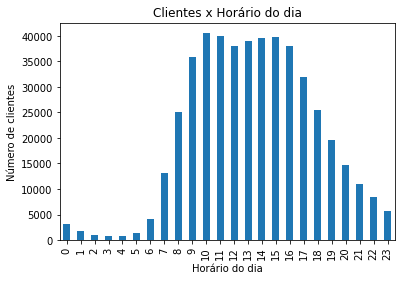

In [37]:
group_ph = df_insta.groupby('order_hour_of_day')['user_id'].count()
group_ph.plot(x='order_hour_of_day', y=group_ph, kind='bar', xlabel='Horário do dia', ylabel='Número de clientes', title='Clientes x Horário do dia')

Escreva suas conclusões aqui

Olhando o Gráfico, podemos notar que a maioria dos clientes fazem pedidos entre 7h da manhã até 20h da noite, que é o período onde a maioria dos pedidos estão concentrados. Notamos um pico entre 9h e 17h que é o horário comercial.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição de compras por hora do dia
- As conclusões foram apresentadas
</div>


### [A3] Em que dia da semana as pessoas fazem compras?

<AxesSubplot:title={'center':'Clientes x Dia da semana'}, xlabel='Dia da semana', ylabel='Contagem de Pedidos'>

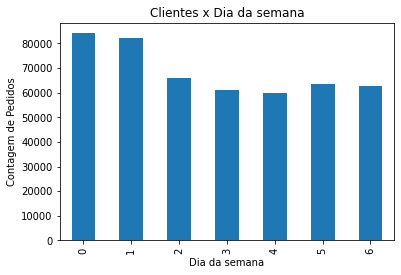

In [38]:
group_pc = df_insta.groupby('order_dow')['order_id'].count()
group_pc.plot(x='order_dow', y=group_pc, kind='bar', xlabel='Dia da semana', ylabel='Contagem de Pedidos', title='Clientes x Dia da semana')

Escreva suas conclusões aqui

Os pedidos estão bem distribuidos durante a semana, porém com destaque maior para Sábado e Domingo, que é onde provavelmente as pessoas possui mais tempo para usar a plataforma.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição de compras por dia da semana
- As conclusões foram apresentadas
</div>


### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

Olhando para o gráfico, notou-se que muitos clientes esperam entre 1 e 9 dias, porém podemos notar também que ouve um pico em um período de 30 dias, onde cerca de 50000 clientes esperam para voltar a fazer um novo pedido.

<AxesSubplot:title={'center':'Clientes x Tempo entre pedidos'}, xlabel='Número de dias entre pedidos', ylabel='Número de clientes'>

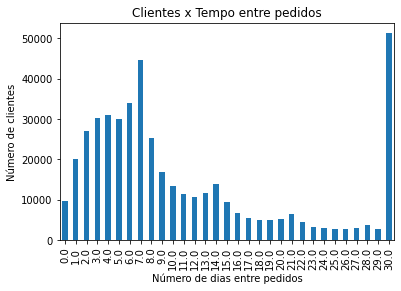

In [39]:
group_pop = df_insta.groupby('days_since_prior_order')['user_id'].count()
group_pop.plot(x='days_since_prior_order', y=group_pop, kind='bar', xlabel='Número de dias entre pedidos', ylabel='Número de clientes', title='Clientes x Tempo entre pedidos')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição do intervalo entre compras dos clientes
- As conclusões foram apresentadas
</div>


# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [40]:
df_filtered_wedsat = df_insta[(df_insta['order_dow'] == 3) | (df_insta['order_dow'] == 6)]
group_df = df_filtered_wedsat.groupby(['order_dow', 'order_hour_of_day']).agg(contagem=('order_id', 'nunique')).reset_index()
print(group_df.head())




   order_dow  order_hour_of_day  contagem
0          3                  0       373
1          3                  1       215
2          3                  2       106
3          3                  3       101
4          3                  4       108


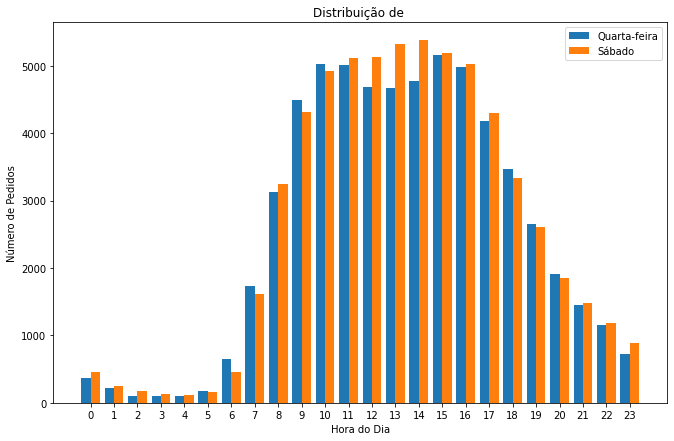

In [41]:
wednesday = group_df[group_df['order_dow'] == 3]
saturday = group_df[group_df['order_dow'] == 6]

plt.figure(figsize=(11, 7)) 
plt.bar(wednesday.order_hour_of_day - 0.2, wednesday.contagem, width=0.4, label='Quarta-feira') 
plt.bar(saturday.order_hour_of_day + 0.2, saturday.contagem, width=0.4, label='Sábado') 
plt.xlabel('Hora do Dia') 
plt.ylabel('Número de Pedidos') 
plt.title('Distribuição de ') 
plt.xticks(range(24)) 
plt.legend() 
plt.show()

Escreva suas conclusões aqui

Olhando para o gráfico, conseguimos notar que não há uma diferença significativa entre Quarta-feira e Sábado para os clientes fazerem os pedidos. 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição de pedidos na Quarta-feira e aos Sábados
- As conclusões foram apresentadas
</div>


### [B2] Qual é a distribuição do número de pedidos por cliente?

In [42]:
group_distribution = df_insta.groupby('user_id')['order_id'].count()
print(group_distribution.head(50))

user_id
2      2
4      2
5      1
6      2
7      2
10     1
11     2
12     1
13     3
14     4
15     5
16     3
17     7
19     2
20     1
21     3
22     2
23     1
24     1
25     1
26     2
27    10
28     5
29     1
30     2
31     3
32     1
33     1
34     1
35     2
36     7
37     2
38     1
40     3
42     1
43     2
46     1
47     1
50    10
51     1
52     2
54    11
55     1
56     2
57     1
58     2
59     3
60     2
61     1
62     1
Name: order_id, dtype: int64


Text(0, 0.5, 'Número de Pedidos')

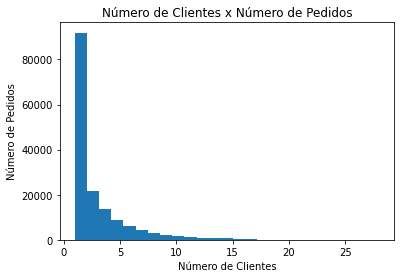

In [43]:
group_distribution.plot(x='user_id', y=group_distribution, kind='hist', title='Número de Clientes x Número de Pedidos', bins=25)
plt.xlabel('Número de Clientes')
plt.ylabel('Número de Pedidos')

Escreva suas conclusões aqui

Nota-se que a distribuição dos pedidos está mais concentrada em clientes que fazem os pedidos entre 0 e 5 produtos.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição de pedidos por cliente
- As conclusões foram apresentadas
</div>


### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [44]:
merge_ord_prod = df_ord.merge(df_prod, on='product_id')
print(merge_ord_prod.head())

   order_id  product_id add_to_cart_order  reordered  \
0   2141543       11440              17.0          0   
1    147172       11440               7.0          1   
2   3341719       11440               4.0          1   
3   1938779       11440               8.0          1   
4   1728338       11440              23.0          0   

                     product_name  aisle_id  department_id  
0  Chicken Breast Tenders Breaded       129              1  
1  Chicken Breast Tenders Breaded       129              1  
2  Chicken Breast Tenders Breaded       129              1  
3  Chicken Breast Tenders Breaded       129              1  
4  Chicken Breast Tenders Breaded       129              1  


In [45]:
df_prod_top_20 = merge_ord_prod.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending=False)
print(df_prod_top_20.head(20))

                                     order_id  add_to_cart_order  reordered  \
product_id product_name                                                       
24852      Banana                       66050              66050      66050   
13176      Bag of Organic Bananas       53297              53297      53297   
21137      Organic Strawberries         37039              37039      37039   
21903      Organic Baby Spinach         33971              33971      33971   
47209      Organic Hass Avocado         29773              29773      29773   
47766      Organic Avocado              24689              24689      24689   
47626      Large Lemon                  21495              21495      21495   
16797      Strawberries                 20018              20018      20018   
26209      Limes                        19690              19690      19690   
27845      Organic Whole Milk           19600              19600      19600   
27966      Organic Raspberries          19197       

In [46]:
df_ord_by_prod = df_ord.groupby('product_id').agg(n_order=('order_id', 'nunique')).sort_values(by='n_order', ascending=False).reset_index().head(20)
df_ord_by_prod

,product_id,n_order
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [47]:
df_dict_prod_id_name = df_prod[['product_id', 'product_name']].copy().drop_duplicates()
df_dict_prod_id_name

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692,49693,SPRING WATER BODY WASH


In [48]:
df_prod_top_20 = df_dict_prod_id_name.merge(df_ord_by_prod, on='product_id')
df_prod_top_20.sort_values(by='n_order', ascending=False).reset_index(drop=True)

,product_id,product_name,n_order
0,24852,Banana,66050
1,13176,Bag of Organic Bananas,53297
2,21137,Organic Strawberries,37039
3,21903,Organic Baby Spinach,33971
4,47209,Organic Hass Avocado,29773
5,47766,Organic Avocado,24689
6,47626,Large Lemon,21495
7,16797,Strawberries,20018
8,26209,Limes,19690
9,27845,Organic Whole Milk,19600


Escreva suas conclusões aqui

Os 20 produtos mais vendidos são esses acima.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Aqui precisamos de pequenos ajustes, pois os resultados não estão corretos (repare também que a lista acima não está ordenada). É necessário fazer o `merge` entre os dados de pedidos e produtos. Por fim, você pode fazer a agregação e apresentar os 20 produtos mais vendidos.
    
```python
    
df_merge = order_products.merge(products, on='..')
top_products = df_merge.groupby(['product_id', 'product_name']).count().sort_values(['order_id'], ascending=False)
# apresente os resultados
```
</s>
</div>


# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

- criar uma variável número de itens por pedido, groupby order_id, nunique ou count product_id, 
- histograma para ver os dados, mediana ou média PARA O VALOR ESPERADO

In [49]:
df_ord_by_qtde = df_ord.groupby('order_id').agg(n_product=('product_id', 'count')).sort_values(by='n_product', ascending=False).reset_index()
df_ord_by_qtde.head(10)

,order_id,n_product
0,61355,127
1,3308010,115
2,2136777,108
3,171934,104
4,1959075,98
5,102236,95
6,1730767,95
7,1800005,92
8,2926893,92
9,1386261,91


Text(0, 0.5, 'Número de Produtos')

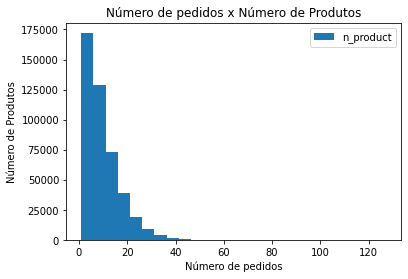

In [50]:
df_ord_by_qtde.plot(x='order_id', y='n_product', kind='hist', title='Número de pedidos x Número de Produtos', bins=25)
plt.xlabel('Número de pedidos')
plt.ylabel('Número de Produtos')

In [51]:
print("A média de produtos que os clientes compram em um pedido é: ", df_ord_by_qtde['n_product'].mean())
print()
print("A mediana é: ", df_ord_by_qtde['n_product'].median())

A média de produtos que os clientes compram em um pedido é:  10.098983215049127

A mediana é:  8.0


Escreva suas conclusões aqui

O que podemos notar é que a maioria das ordem de pedidos está com concentrada entre 0 e 20 produtos dentro da ordem. E sua média e mediana representam bem os dados do gráfico.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- O estudante analisou a distribuição do número de itens por pedido
- As conclusões foram apresentadas
</div>


### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

- identificar o que são pedidos repetidos

In [52]:
df_ord['reordered_new'] = df_ord[df_ord['reordered'] == 1]['reordered']
print(df_ord.head(20))

    order_id  product_id add_to_cart_order  reordered  reordered_new
0    2141543       11440              17.0          0            NaN
1     567889        1560               1.0          1            1.0
2    2261212       26683               1.0          1            1.0
3     491251        8670              35.0          1            1.0
4    2571142        1940               5.0          1            1.0
5    2456893       21616               4.0          1            1.0
6     644579       12341               5.0          1            1.0
7    2231852       44925              10.0          1            1.0
8    3185766       36259              14.0          1            1.0
9     420019       23315               4.0          1            1.0
10    925051        9421               2.0          1            1.0
11     44064       22963              28.0          0            NaN
12    522547       40571              10.0          1            1.0
13   2475670       48520          

In [53]:
df_ord_by_rep = df_ord.groupby(['product_id', 'reordered_new']).agg(n_order=('order_id', 'nunique')).sort_values(by='n_order', ascending=False).reset_index().head(20)
df_ord_by_rep

,product_id,reordered_new,n_order
0,24852,1.0,55763
1,13176,1.0,44450
2,21137,1.0,28639
3,21903,1.0,26233
4,47209,1.0,23629
5,47766,1.0,18743
6,27845,1.0,16251
7,47626,1.0,15044
8,27966,1.0,14748
9,16797,1.0,13945


In [54]:
df_dict_prod_id_name = df_prod[['product_id', 'product_name']].copy().drop_duplicates()
df_dict_prod_id_name

,product_id,product_name
0,1,Chocolate Sandwich Cookies
1,2,All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...
4,5,Green Chile Anytime Sauce
...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692,49693,SPRING WATER BODY WASH


In [55]:
df_prod_top_20_reord = df_dict_prod_id_name.merge(df_ord_by_rep, on='product_id')
df_prod_top_20_reord.sort_values(by='n_order', ascending=False).reset_index(drop=True)

,product_id,product_name,reordered_new,n_order
0,24852,Banana,1.0,55763
1,13176,Bag of Organic Bananas,1.0,44450
2,21137,Organic Strawberries,1.0,28639
3,21903,Organic Baby Spinach,1.0,26233
4,47209,Organic Hass Avocado,1.0,23629
5,47766,Organic Avocado,1.0,18743
6,27845,Organic Whole Milk,1.0,16251
7,47626,Large Lemon,1.0,15044
8,27966,Organic Raspberries,1.0,14748
9,16797,Strawberries,1.0,13945


Escreva suas conclusões aqui

Esses 20 acima são os produtos mais populares nos pedidos repetidos e nota-se uma semelhança com a tabela dos 20 produtos mais vendidos pela plataforma também.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>O resultado acima não está ordenado em ordem decrescente.</s>
</div>


### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

Escreva suas conclusões aqui

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

Escreva suas conclusões aqui

# Conclusão geral do projeto:

Conclusões com esse projeto:
- A plataforma recebe muitos pedidos durante toda a semana e está muito bem distribuídos os dias, porém um pequeno destaque para o final de semana que é quando eu acredito que as pessoas possuem mais tempo para acessar a plataforma e fazer o pedido.
- Os pedidos são mais concentramos em horário comercial, entre 9h até 17h, porém podemos notar que os clientes fazem pedidos até de madrugada.
- Notamos também que a maioria dos valores ausentes na coluna 'days_since_prior_order' foram pessoas que provavelmente colocaram o pedido no carrinho e não finalizaram a compra, um total de 28817 que é um bom número para trabalhar na análise.
- Outra análise interessante é que muitos clientes esperam entre 1 e 9 dias para fazer um novo pedido, porém tivemos um pico em um período de 30 dias, onde cerca de 50000 clientes esperam para voltar a fazer um novo pedido.
- Outra dado importante de notar que os 20 produtos mais populares se asemelham aos 20 produtos mais comuns nos pedidos repetidos.
- Outro ponto importante é que a maioria das ordens de pedidos está concentrada entre 0 e 20 produtos com uma média de 10,09 produtos por ordem e uma mediana de 8 produtos, ilustrando bem a concentração dos pedidos.
- Por fim, pode-se notar que a maioria dos clientes fazem um pedido entre 0 e 5 produtos na ordem do pedido.